In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import SQLContext
from pyspark.sql.functions import col

# setup the necessary contexts
spark = SparkSession.builder.enableHiveSupport().getOrCreate()
spark.sparkContext.setLogLevel("ERROR")
sqlContext = SQLContext(spark)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
# read the json file and create the dataframe

file_location = "/content/drive/MyDrive/Clean_Dataset.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


pd_df = df.toPandas()
pd_df

_c0   airline   flight source_city departure_time stops  \
0            0  SpiceJet  SG-8709       Delhi        Evening  zero   
1            1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3   Vistara   UK-995       Delhi        Morning  zero   
4            4   Vistara   UK-963       Delhi        Morning  zero   
...        ...       ...      ...         ...            ...   ...   
300148  300148   Vistara   UK-822     Chennai        Morning   one   
300149  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [ ]:
df.printSchema()



root
 |-- _c0: integer (nullable = true)
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import col, count, when

# Check is there any missing values
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|_c0|airline|flight|source_city|departure_time|stops|arrival_time|destination_city|class|duration|days_left|price|
+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|  0|      0|     0|          0|             0|    0|           0|               0|    0|       0|        0|    0|
+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+



In [ ]:
# Move the target value to the first column
last_column_name = "price"

# Select the last column and then the remaining columns excluding the last one
selected_columns = [last_column_name] + [col for col in df.columns if col != last_column_name]

# Use select to rearrange the columns
df = df.select(selected_columns)

# Show the DataFrame to verify the column order
df.show(5)

+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
|price|_c0| airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|
+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
| 5953|  0|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1|
| 5953|  1|SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
| 5956|  2| AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1|
| 5955|  3| Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1|
| 5955|  4| Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
+-----+---+--------+-------+-----------+

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for plotting
pdf = df.toPandas()

In [ ]:
pdf

price     _c0   airline   flight source_city departure_time stops  \
0        5953       0  SpiceJet  SG-8709       Delhi        Evening  zero   
1        5953       1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2        5956       2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3        5955       3   Vistara   UK-995       Delhi        Morning  zero   
4        5955       4   Vistara   UK-963       Delhi        Morning  zero   
...       ...     ...       ...      ...         ...            ...   ...   
300148  69265  300148   Vistara   UK-822     Chennai        Morning   one   
300149  77105  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  79099  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  81585  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  81585  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  
0               Night           Mumbai   Economy      2.17          1  
1             Morning           Mumbai   Economy      2.33          1  
2       Early_Morning           Mumbai   Economy      2.17          1  
3           Afternoon           Mumbai   Economy      2.25          1  
4             Morning           Mumbai   Economy      2.33          1  
...               ...              ...       ...       ...        ...  
300148        Evening        Hyderabad  Business     10.08         49  
300149          Night        Hyderabad  Business     10.42         49  
300150          Night        Hyderabad  Business     13.83         49  
300151        Evening        Hyderabad  Business     10.00         49  
300152        Evening        Hyderabad  Business     10.08         49  

[300153 rows x 12 columns]

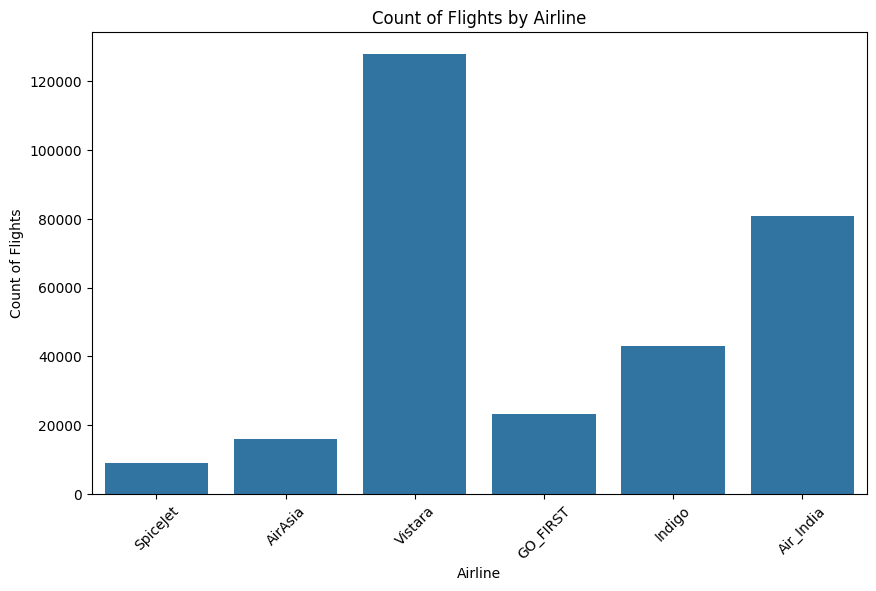

In [ ]:
# Count of Flights by Airline
plt.figure(figsize=(10, 6))
sns.countplot(x="airline", data=pdf)
plt.xticks(rotation=45)
plt.title("Count of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Count of Flights")
plt.show()

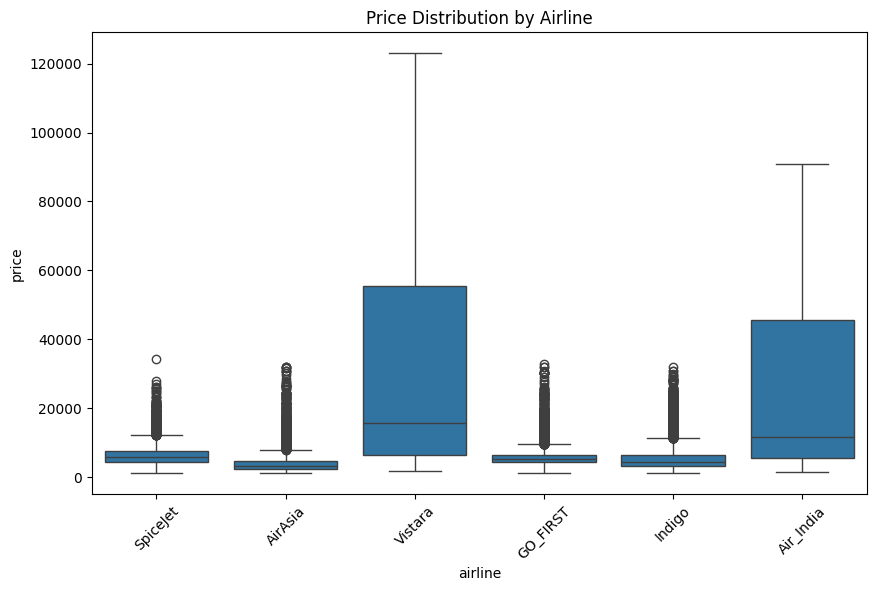

In [ ]:
# Price Distribution by Airline
plt.figure(figsize=(10, 6))
sns.boxplot(x="airline", y="price", data=pdf)
plt.xticks(rotation=45)
plt.title("Price Distribution by Airline")
plt.show()

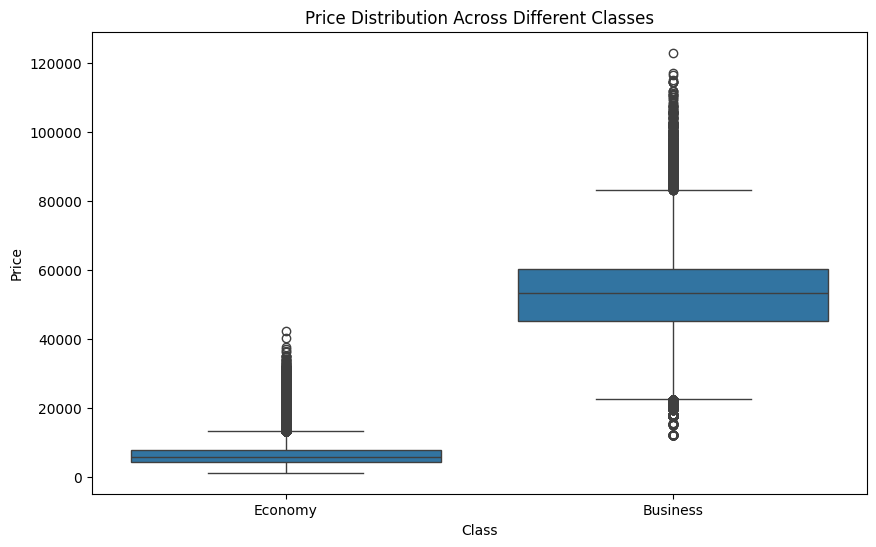

In [ ]:
# Price Distribution Across Different Classes
plt.figure(figsize=(10, 6))
sns.boxplot(x="class", y="price", data=pdf)
plt.title("Price Distribution Across Different Classes")
plt.xlabel("Class")
plt.ylabel("Price")
plt.show()

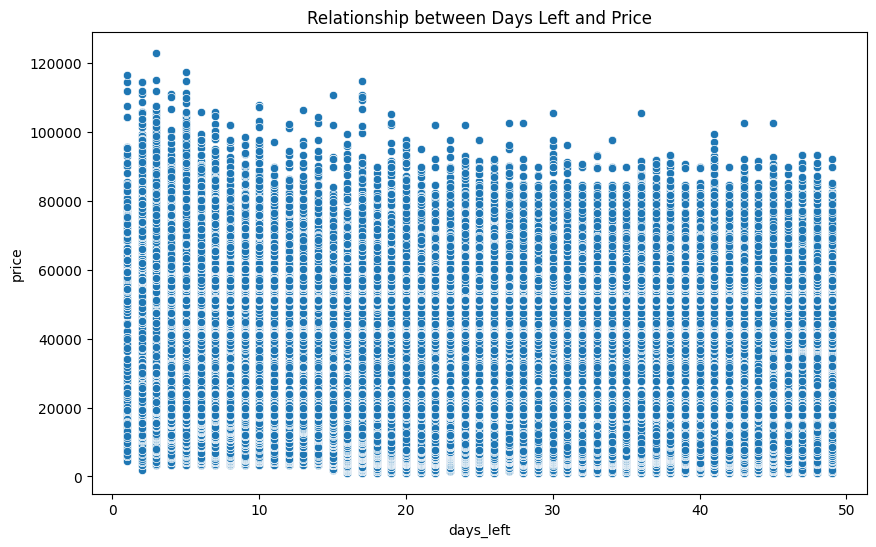

In [ ]:
# Relationship between Days Left and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="days_left", y="price", data=pdf)
plt.title("Relationship between Days Left and Price")
plt.show()

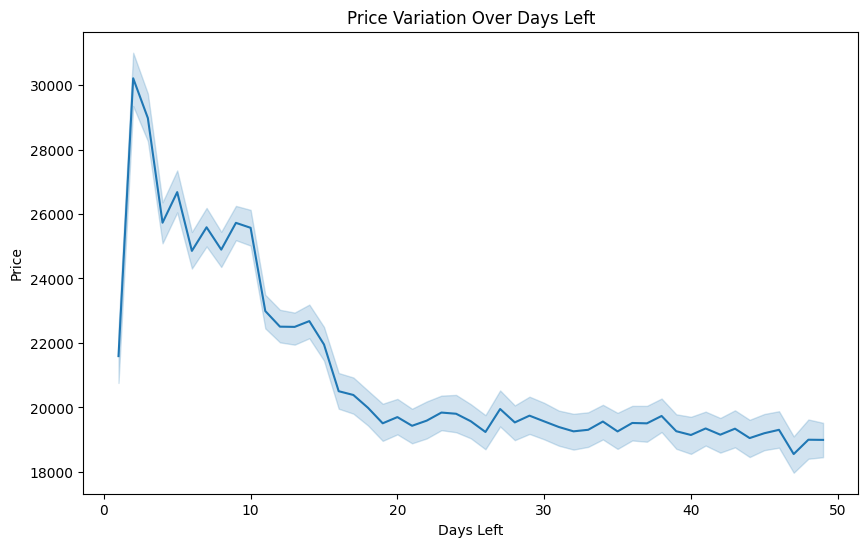

In [ ]:

# Price Variation Over Days Left
plt.figure(figsize=(10, 6))
sns.lineplot(x="days_left", y="price", data=pdf)
plt.title("Price Variation Over Days Left")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()

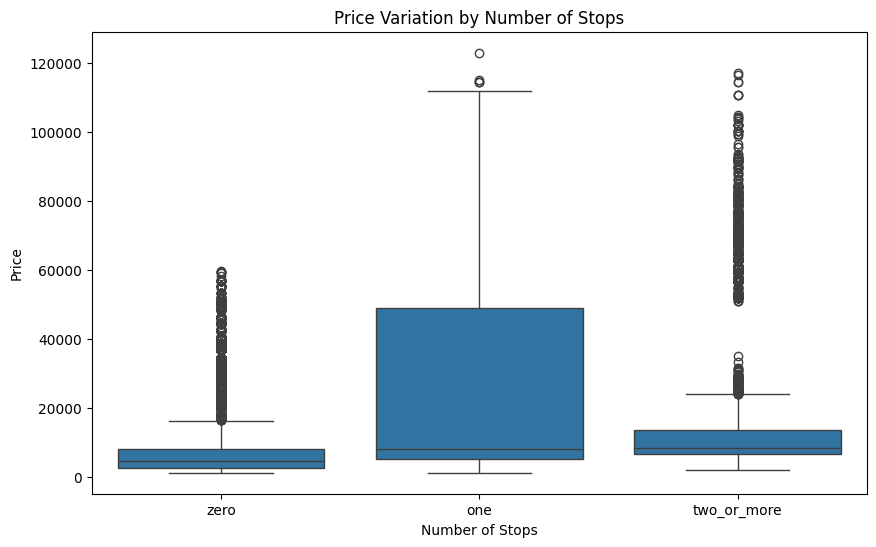

In [ ]:
# Price Variation by Number of Stops
plt.figure(figsize=(10, 6))
sns.boxplot(x="stops", y="price", data=pdf)
plt.title("Price Variation by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()

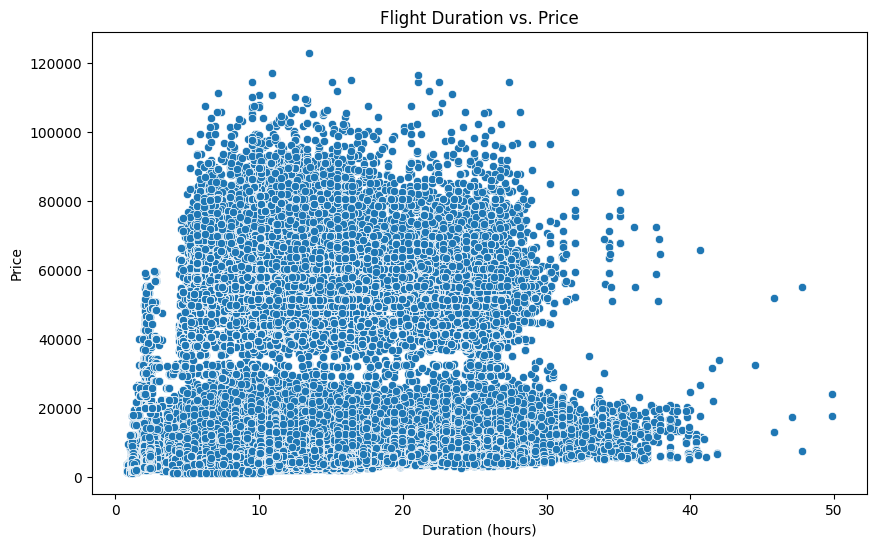

In [ ]:
# Flight Duration vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="duration", y="price", data=pdf)
plt.title("Flight Duration vs. Price")
plt.xlabel("Duration (hours)")
plt.ylabel("Price")
plt.show()

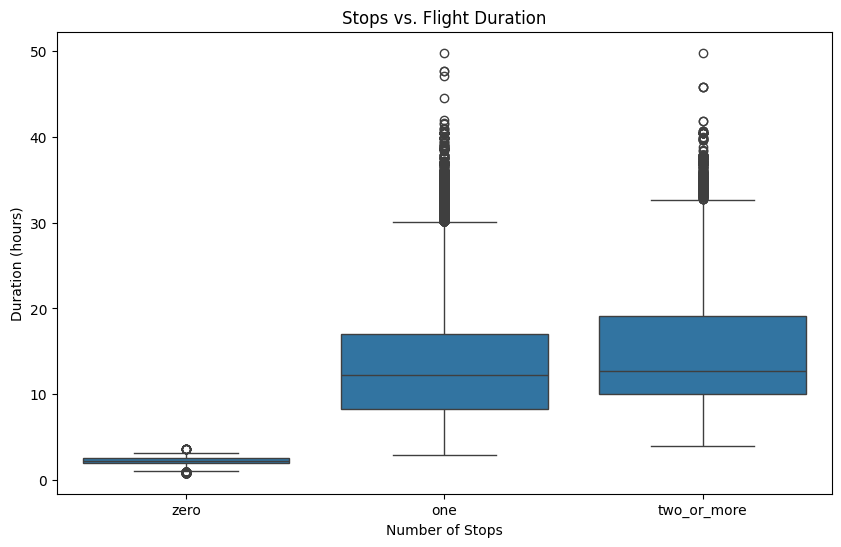

In [ ]:
# Stops vs. Flight Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x="stops", y="duration", data=pdf)
plt.title("Stops vs. Flight Duration")
plt.xlabel("Number of Stops")
plt.ylabel("Duration (hours)")
plt.show()

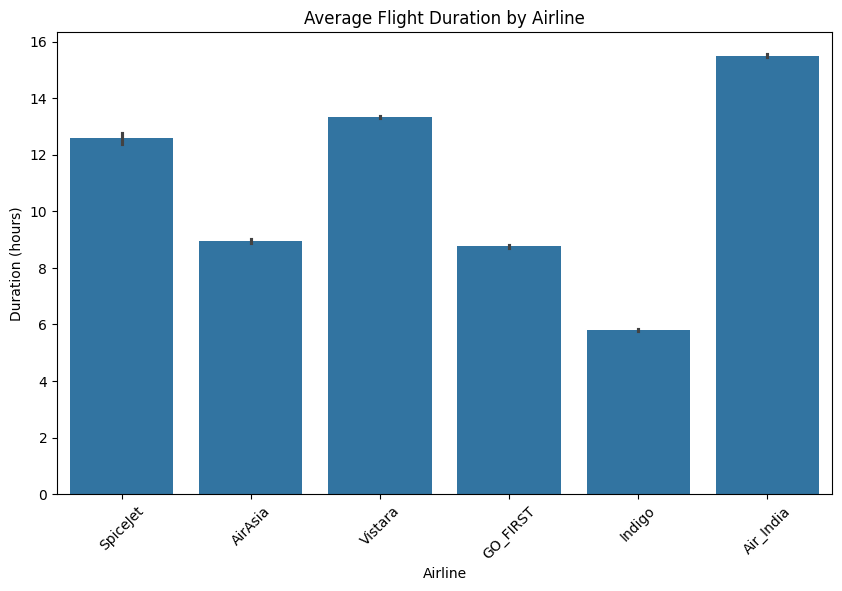

In [ ]:
# Average Flight Duration by Airline
plt.figure(figsize=(10, 6))
sns.barplot(x="airline", y="duration", data=pdf)
plt.xticks(rotation=45)
plt.title("Average Flight Duration by Airline")
plt.xlabel("Airline")
plt.ylabel("Duration (hours)")
plt.show()

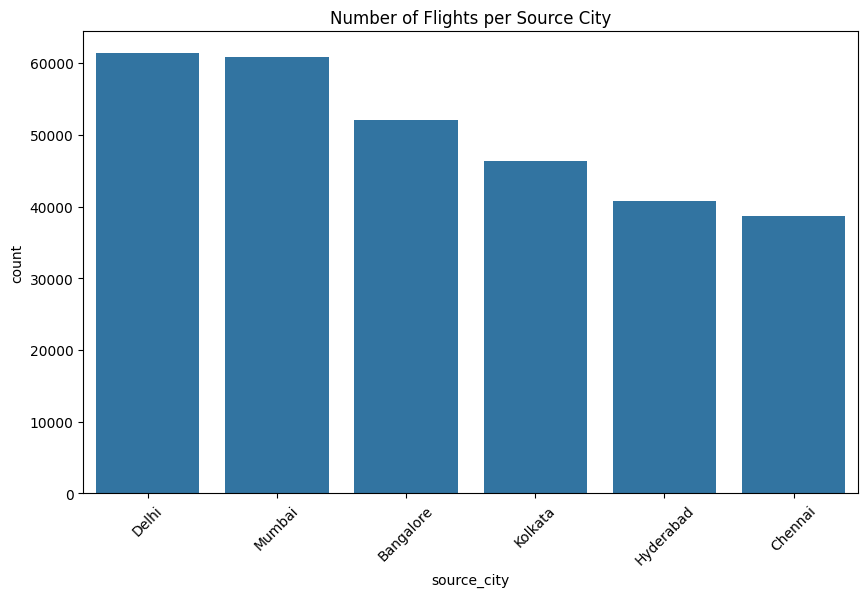

In [ ]:
# Number of Flights per Source City
plt.figure(figsize=(10, 6))
sns.countplot(x="source_city", data=pdf)
plt.xticks(rotation=45)
plt.title("Number of Flights per Source City")
plt.show()


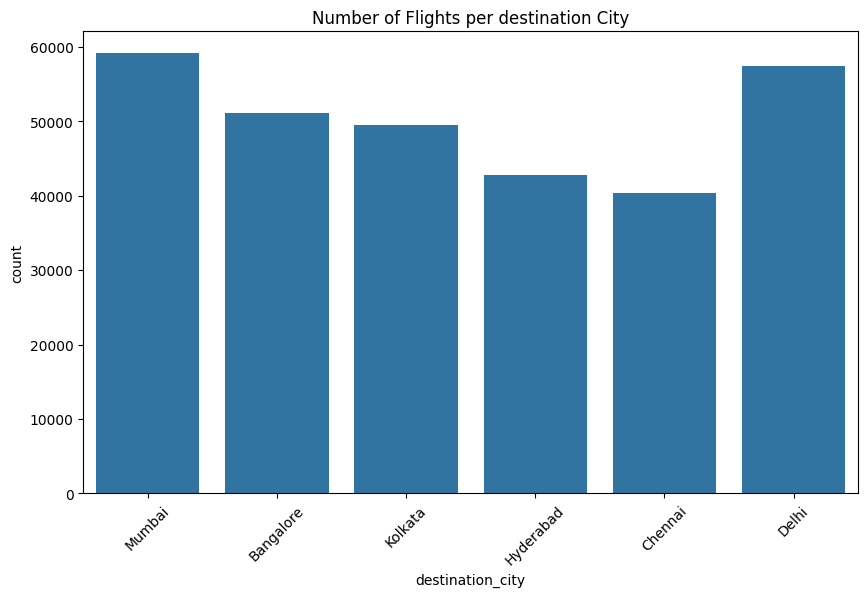

In [ ]:

# Number of Flights per destination City
plt.figure(figsize=(10, 6))
sns.countplot(x="destination_city", data=pdf)
plt.xticks(rotation=45)
plt.title("Number of Flights per destination City")
plt.show()

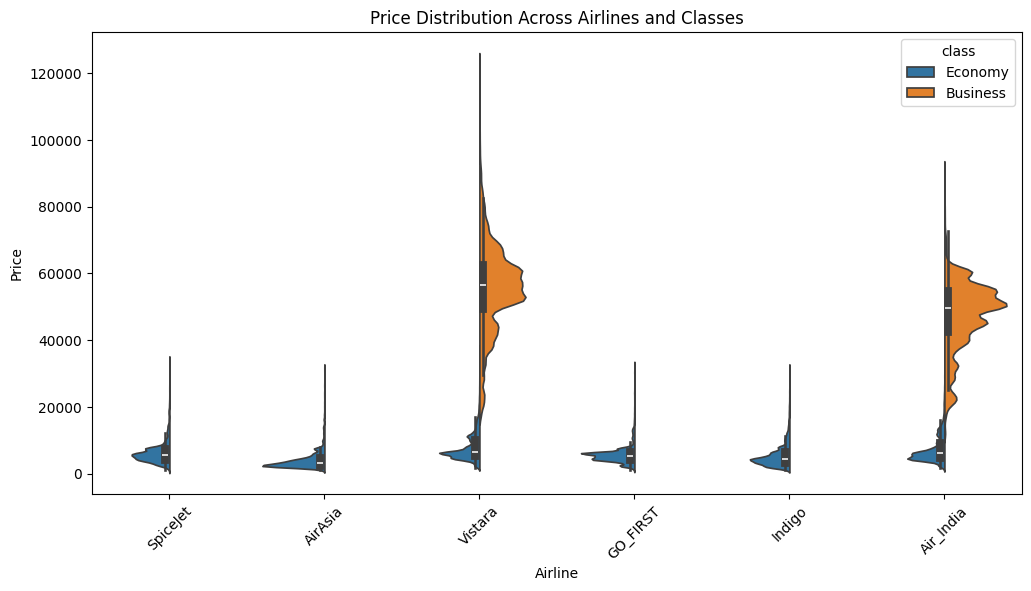

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="airline", y="price", hue="class", data=pdf, split=True)
plt.xticks(rotation=45)
plt.title("Price Distribution Across Airlines and Classes")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

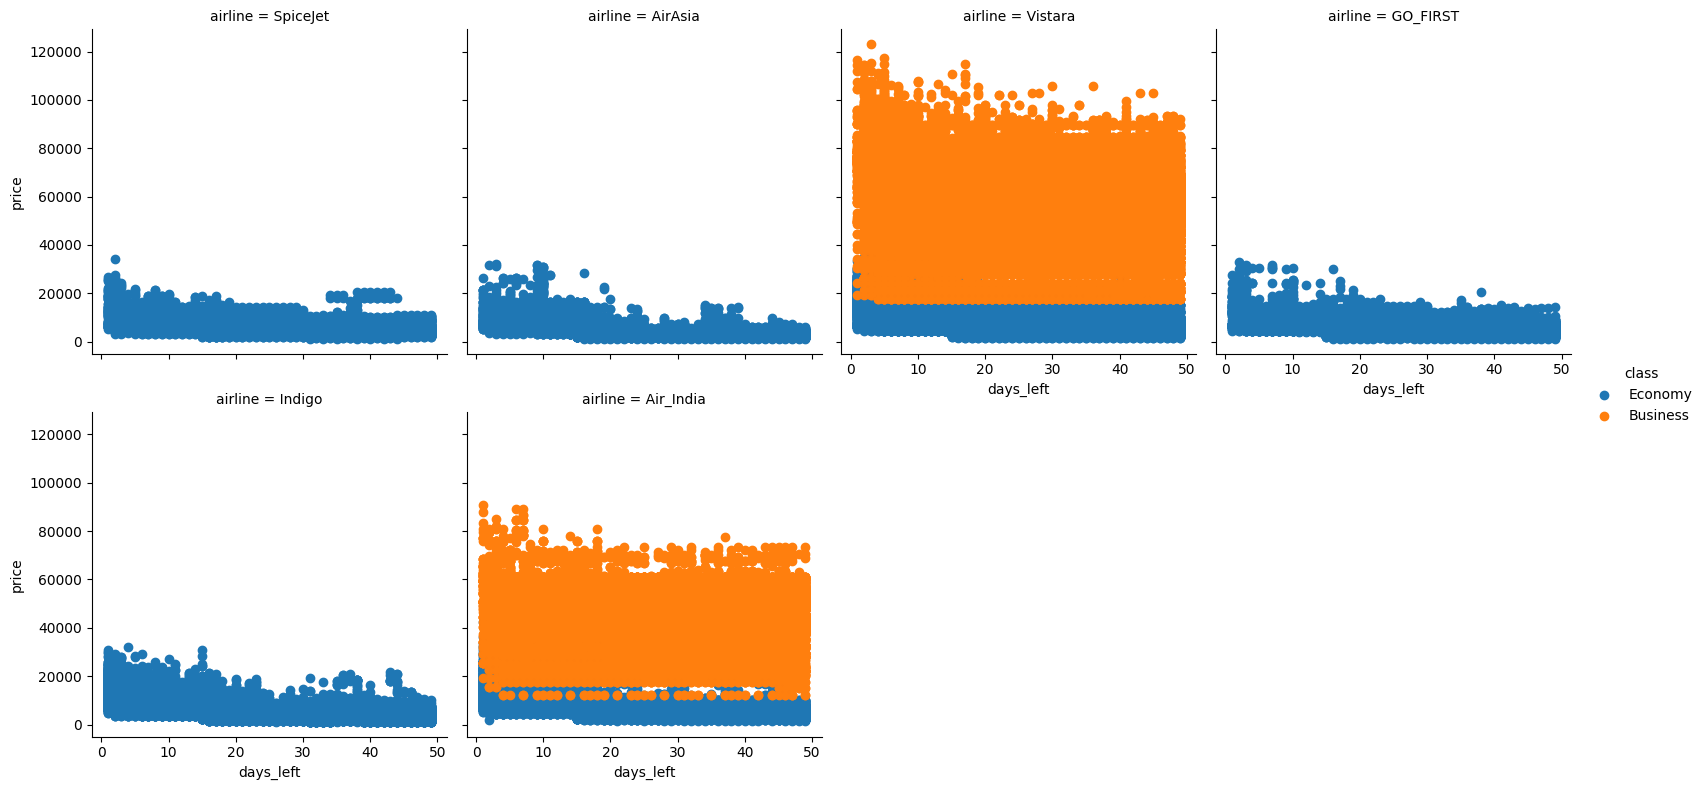

In [ ]:
g = sns.FacetGrid(pdf, col="airline", hue="class", col_wrap=4, height=4)
g = g.map(plt.scatter, "days_left", "price").add_legend()
plt.show()

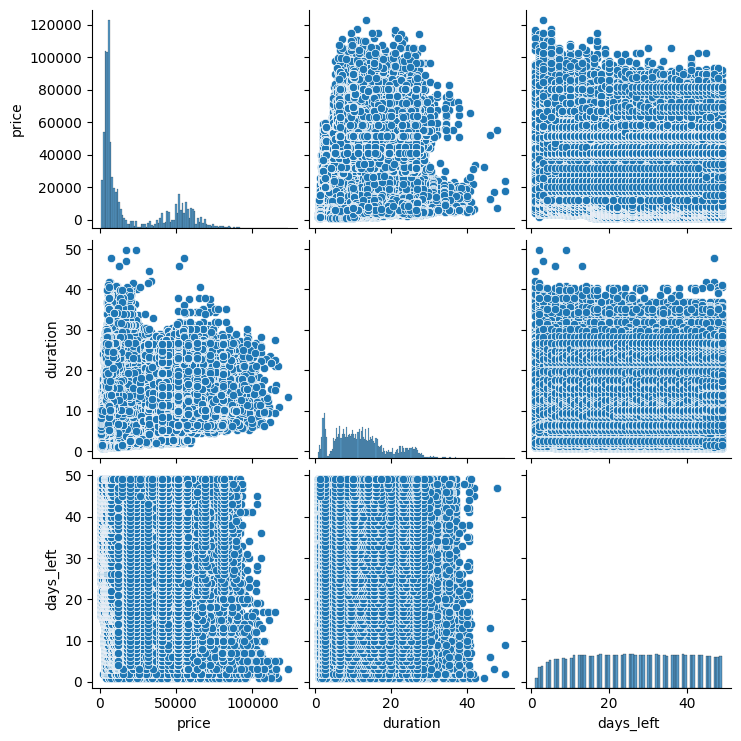

In [ ]:
# Selecting a few relevant columns for the pairplot
sns.pairplot(pdf[['price', 'duration', 'days_left']])
plt.show()

<ipython-input-24-dd2b935e5dfc>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pdf.pivot_table(index='departure_time', columns='days_left', values='price', aggfunc='mean')


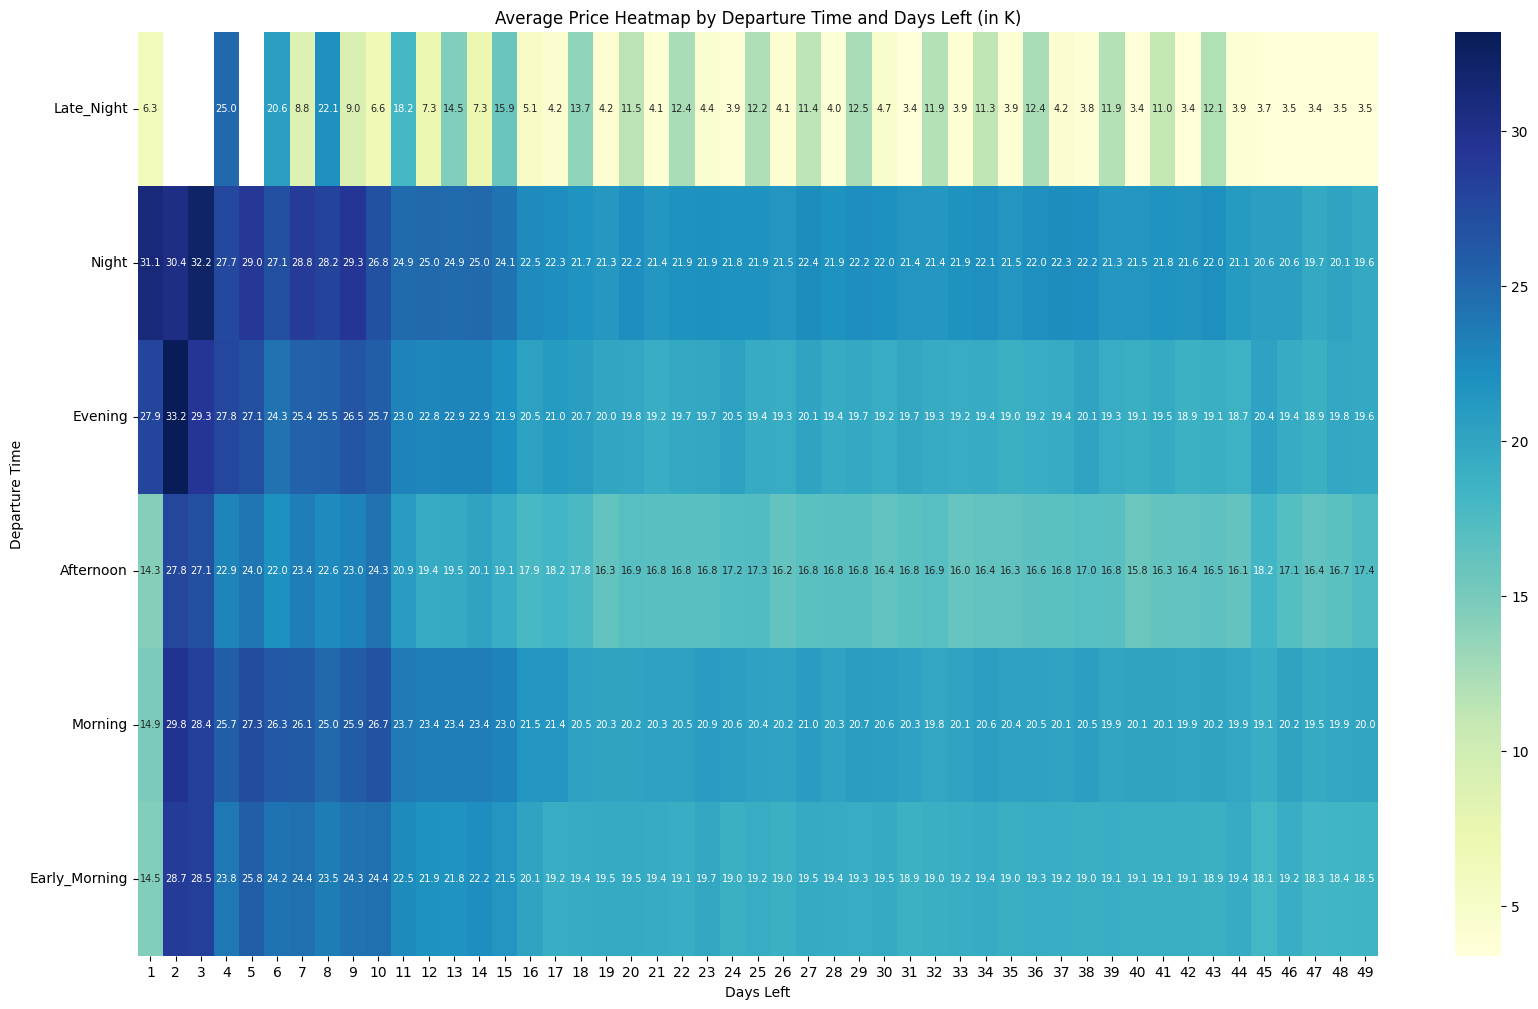

In [ ]:
from pandas.api.types import CategoricalDtype

# Define the order for departure times
time_order = ["Late_Night", "Night", "Evening", "Afternoon", "Morning", "Early_Morning"]

# Converting departure_time to an ordered categorical type
pdf['departure_time'] = pd.Categorical(pdf['departure_time'], categories=time_order, ordered=True)

# Sorting the DataFrame based on the ordered category
pdf.sort_values('departure_time', inplace=True)

# Creating a pivot table for the heatmap
pivot_table = pdf.pivot_table(index='departure_time', columns='days_left', values='price', aggfunc='mean')

# To improve readability of large numbers, we can divide by 1000 and add 'K' to represent thousands
pivot_table = pivot_table / 1000

plt.figure(figsize=(20, 12))
ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", annot_kws={"size": 7})
plt.title("Average Price Heatmap by Departure Time and Days Left (in K)")
plt.xlabel("Days Left")
plt.ylabel("Departure Time")

# Fix for the missing labels in the y-axis
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(pdf, x="duration", y="price", color="airline", hover_data=['days_left'])
fig.update_layout(title="Interactive Scatter Plot: Price vs Duration by Airline")
fig.show()

In [ ]:

df.show(10)

+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
|price|_c0| airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|
+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
| 5953|  0|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1|
| 5953|  1|SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
| 5956|  2| AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1|
| 5955|  3| Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1|
| 5955|  4| Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
| 5955|  5| Vistara| UK-945|      Delhi|

In [ ]:
from pyspark.ml.feature import StringIndexer

# Convert string columns to indexed numeric columns
indexer = StringIndexer(inputCols=["airline", "source_city", "departure_time",
                                   "stops", "arrival_time", "destination_city",
                                   "class"],
                        outputCols=["airline_index", "source_city_index",
                                    "departure_time_index", "stops_index",
                                    "arrival_time_index", "destination_city_index",
                                    "class_index"])
df_indexed = indexer.fit(df).transform(df)

df_indexed.show()

+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-------------+-----------------+--------------------+-----------+------------------+----------------------+-----------+
|price|_c0|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|airline_index|source_city_index|departure_time_index|stops_index|arrival_time_index|destination_city_index|class_index|
+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-------------+-----------------+--------------------+-----------+------------------+----------------------+-----------+
| 5953|  0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1|          5.0|              0.0|                 2.0|        1.0|               0.0|                   0.0|        0.0|
| 5953|  1| SpiceJet|SG-8157|      Delhi

In [ ]:
nonFeatureCols = ["_c0", "flight", "airline", "source_city", "departure_time",
                  "stops", "arrival_time", "destination_city", "class"]
featureCols = [item for item in df.columns if item not in nonFeatureCols]

# VectorAssembler Assembles all of these columns into one single vector.
from pyspark.ml.feature import VectorAssembler

assembler = (VectorAssembler()
  .setInputCols(featureCols)
  .setOutputCol("features"))

finalPrep = assembler.transform(df)

In [ ]:
finalPrep.show()

+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+------------------+
|price|_c0|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|          features|
+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+------------------+
| 5953|  0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| [5953.0,2.17,1.0]|
| 5953|  1| SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| [5953.0,2.33,1.0]|
| 5956|  2|  AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1| [5956.0,2.17,1.0]|
| 5955|  3|  Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1| [5955.0,2.25,1.0]|
| 5955|  4|  Vistara

In [ ]:
training, test = finalPrep.randomSplit([0.7, 0.3])

training.cache()
test.cache()

print(training.count())
print(test.count())

209622
90531


In [ ]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

gbtModel = (GBTRegressor()
  .setLabelCol("price")
  .setFeaturesCol("features"))

paramGrid = (ParamGridBuilder()
  .addGrid(gbtModel.maxDepth, [5, 10])
  .addGrid(gbtModel.maxIter, [20, 60])
  .build())

stages = [gbtModel]

pipeline = Pipeline().setStages(stages)

cv = (CrossValidator()
  .setEstimator(pipeline)
  .setEstimatorParamMaps(paramGrid)
  .setEvaluator(RegressionEvaluator().setLabelCol("price")))

pipelineFitted = cv.fit(training)

# Print the best model parameters
print("The Best Parameters:\n--------------------")
print(pipelineFitted.bestModel.stages[0])
pipelineFitted.bestModel.stages[0].extractParamMap()
# Save the best model to a path
pipelineFitted.bestModel.write().overwrite().save("/content/flight_fare_gbt_model")


The Best Parameters:
--------------------
GBTRegressionModel: uid=GBTRegressor_473c6407f95a, numTrees=60, numFeatures=3


In [ ]:
pipelineFitted.bestModel

holdout = (pipelineFitted.bestModel
  .transform(test)
  .selectExpr("prediction as raw_prediction",
    "double(round(prediction)) as rounded_prediction",
    "price",
    "abs(price - prediction) as absolute_difference"))

pd_holdout = holdout.toPandas()
pd_holdout

raw_prediction  rounded_prediction   price  absolute_difference
0         1858.890010              1859.0    1603           255.890010
1         1858.890010              1859.0    1603           255.890010
2         1858.890010              1859.0    1603           255.890010
3         1858.107975              1858.0    1603           255.107975
4         1858.107975              1858.0    1603           255.107975
...               ...                 ...     ...                  ...
89885    85176.131168             85176.0  111883         26706.868832
89886    84704.271888             84704.0  114507         29802.728112
89887    83099.729136             83100.0  114704         31604.270864
89888    82033.015851             82033.0  114705         32671.984149
89889    84154.107602             84154.0  123071         38916.892398

[89890 rows x 4 columns]

In [ ]:
# Calculate Mean Squared Error (MSE)
mse_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="mse")
mse = mse_evaluator.evaluate(holdout)

# Calculate Root Mean Squared Error (RMSE)
rmse_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="rmse")
rmse = rmse_evaluator.evaluate(holdout)

# Calculate Mean Absolute Error (MAE)
mae_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="mae")
mae = mae_evaluator.evaluate(holdout)

# Calculate R-squared
r2_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="r2")
r2 = r2_evaluator.evaluate(holdout)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 1489467.2835131825
Root Mean Squared Error (RMSE): 1220.4373328906252
Mean Absolute Error (MAE): 552.7835243074869
R-squared: 0.9971107913816576


In [ ]:
# Display the first few rows of the table
print(pd_holdout.sample(20))

       raw_prediction  rounded_prediction  price  absolute_difference
71322    49326.688841             49327.0  49613           286.311159
61280    12981.143906             12981.0  14014          1032.856094
61200    12974.650852             12975.0  13443           468.349148
44422    10044.746205             10045.0   9879           165.746205
13712     4267.833938              4268.0   4263             4.833938
35780     6573.445655              6573.0   6720           146.554345
7142      3533.948679              3534.0   3381           152.948679
67503    44630.754811             44631.0  42521          2109.754811
52452    15984.240476             15984.0  18879          2894.759524
25619     5573.500514              5574.0   5761           187.499486
64614    38936.826051             38937.0  35586          3350.826051
89767    84265.344762             84265.0  90468          6202.655238
65873    39333.604490             39334.0  39547           213.395510
84963    62344.27537

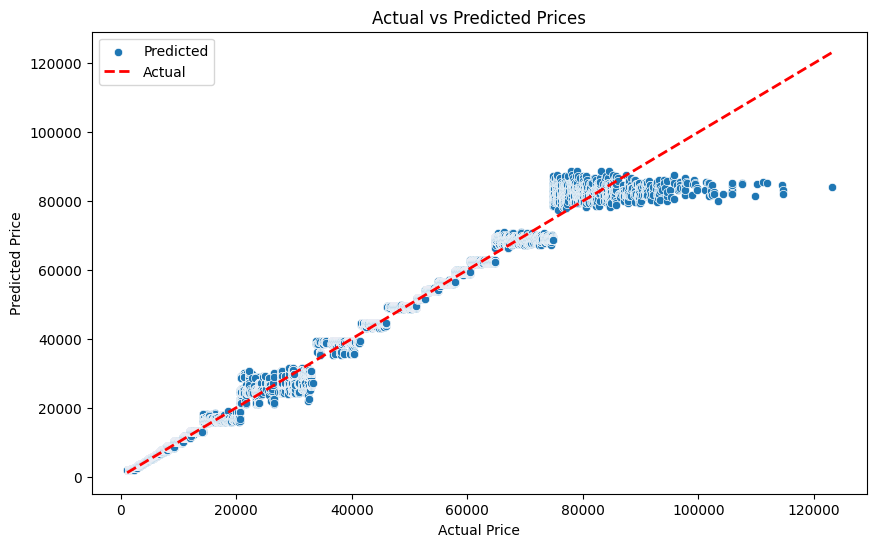

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="rounded_prediction", data=pd_holdout)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([pd_holdout["price"].min(), pd_holdout["price"].max()],
         [pd_holdout["price"].min(), pd_holdout["price"].max()],
         color='red', lw=2, linestyle='--')
plt.legend(['Predicted', 'Actual'])
plt.show()

In [ ]:
!zip -r flight_fare_model.zip flight_fare_gbt_model
from google.colab import files
files.download("flight_fare_model.zip")


  adding: flight_fare_gbt_model/ (stored 0%)
  adding: flight_fare_gbt_model/metadata/ (stored 0%)
  adding: flight_fare_gbt_model/metadata/part-00000 (deflated 20%)
  adding: flight_fare_gbt_model/metadata/_SUCCESS (stored 0%)
  adding: flight_fare_gbt_model/metadata/._SUCCESS.crc (stored 0%)
  adding: flight_fare_gbt_model/metadata/.part-00000.crc (stored 0%)
  adding: flight_fare_gbt_model/stages/ (stored 0%)
  adding: flight_fare_gbt_model/stages/0_GBTRegressor_c662db8fb26f/ (stored 0%)
  adding: flight_fare_gbt_model/stages/0_GBTRegressor_c662db8fb26f/metadata/ (stored 0%)
  adding: flight_fare_gbt_model/stages/0_GBTRegressor_c662db8fb26f/metadata/part-00000 (deflated 41%)
  adding: flight_fare_gbt_model/stages/0_GBTRegressor_c662db8fb26f/metadata/_SUCCESS (stored 0%)
  adding: flight_fare_gbt_model/stages/0_GBTRegressor_c662db8fb26f/metadata/._SUCCESS.crc (stored 0%)
  adding: flight_fare_gbt_model/stages/0_GBTRegressor_c662db8fb26f/metadata/.part-00000.crc (stored 0%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>